In [1]:
import pandas as pd

# Define the file path
file_path = "/home/jovyan/456/456supplychainanalytics/Koe-Meyer Case/Koe-Meyer Data.xlsx"

# Read all sheets into a dictionary of dataframes
all_sheets = pd.read_excel(file_path, sheet_name=None)

# Print the names of the sheets
sheet_names = all_sheets.keys()
print("Sheet names:", sheet_names)

Sheet names: dict_keys(['All', 'Office Supplies', 'Contingent Labor', 'Legal Services'])


In [2]:
# Access data from a specific sheet
office_supplies = all_sheets['Office Supplies']
print("Data from Sheet1:")
print(office_supplies.head())

Contingent_Labor = all_sheets['Contingent Labor']
print("Data from Sheet2:")
print(Contingent_Labor.head())

Legal_Services = all_sheets['Legal Services']
print("Data from Sheet3:")
print(Legal_Services.head())

Data from Sheet1:
   No.         Category                Supplier  Total Spend  Geo-Coverage  \
0    1  Office Supplies              OFFICE INC      2072047             1   
1    2  Office Supplies        STAPLES & SCHOKS      1340109             8   
2    3  Office Supplies                INDO-OFF      1306916             3   
3    4  Office Supplies  TWIST & SHINE PRODUCTS       390824             9   
4    5  Office Supplies  GUERNSEY BEST PRODUCTS       359192             8   

   Available Capacity  Switching Costs  Substitution Options  \
0                   5                5                     6   
1                   9                6                    10   
2                   2                3                     5   
3                   3                8                     7   
4                   4                6                     3   

   Savings Opportunity  Integrated Solutions  Leadership  Innovation  \
0                    2                     5           8

### 1. For each category (Office Supplies, Contingent Labor, Legal Services), create a bar chart with respect to the total spend by each supplier. What do you observe? 


We can see that for each category, the total spend is not evenly distributed among the suppliers. In fact, most of the spending is concentrated on a few suppliers.This suggests that there are a few suppliers that are preferred by the company for each category.

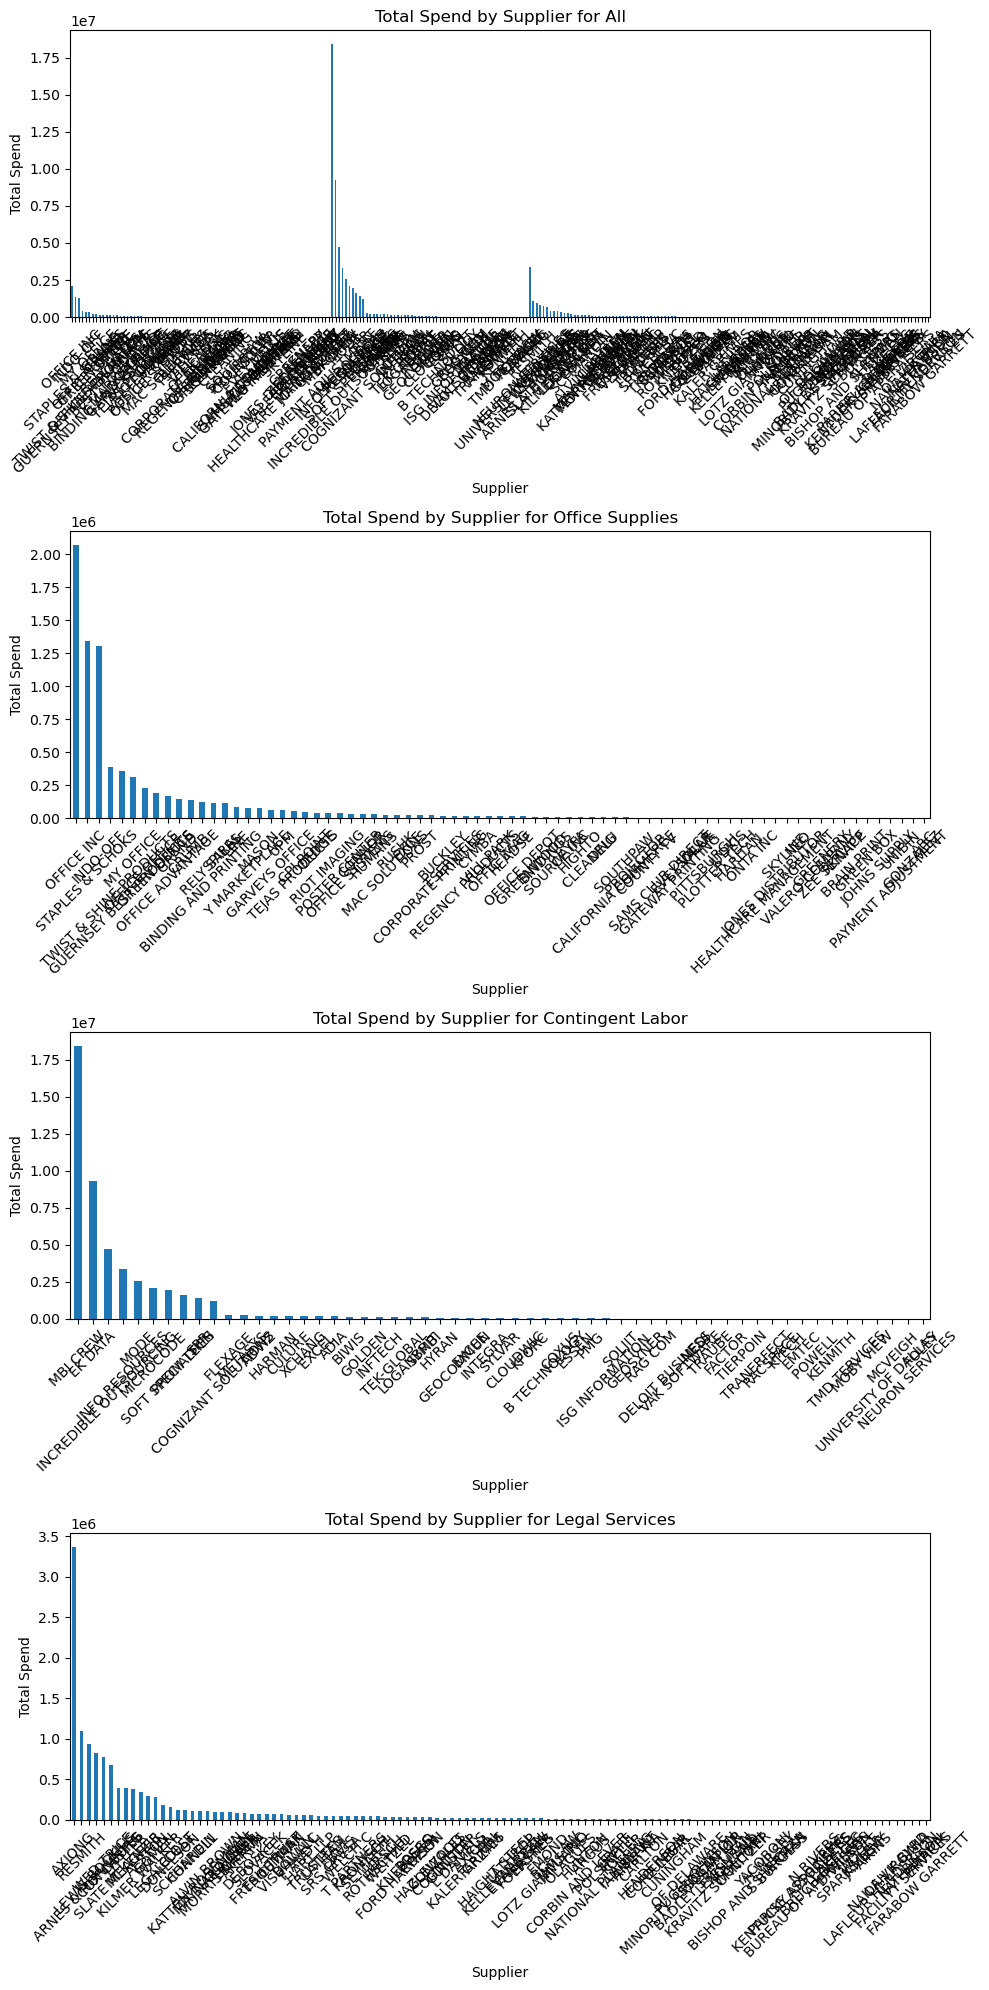

In [3]:
import matplotlib.pyplot as plt

# Create a figure for the subplots
fig, axes = plt.subplots(len(all_sheets), 1, figsize=(10, len(all_sheets) * 5))

if len(all_sheets) == 1:
    axes = [axes]  # Ensure axes is always iterable

# Loop through each sheet and plot the total spend by supplier
for ax, (sheet_name, df) in zip(axes, all_sheets.items()):
    df.plot(kind='bar', x='Supplier', y='Total Spend', ax=ax, legend=False)
    ax.set_title(f'Total Spend by Supplier for {sheet_name}')
    ax.set_xlabel('Supplier')
    ax.set_ylabel('Total Spend')
    ax.tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### 2. For each category (Office Supplies, Contingent Labor, Legal Services), create a strategic matrix plot using geographic coverage against total spend and populate data of the suppliers. What do you find from each plot?


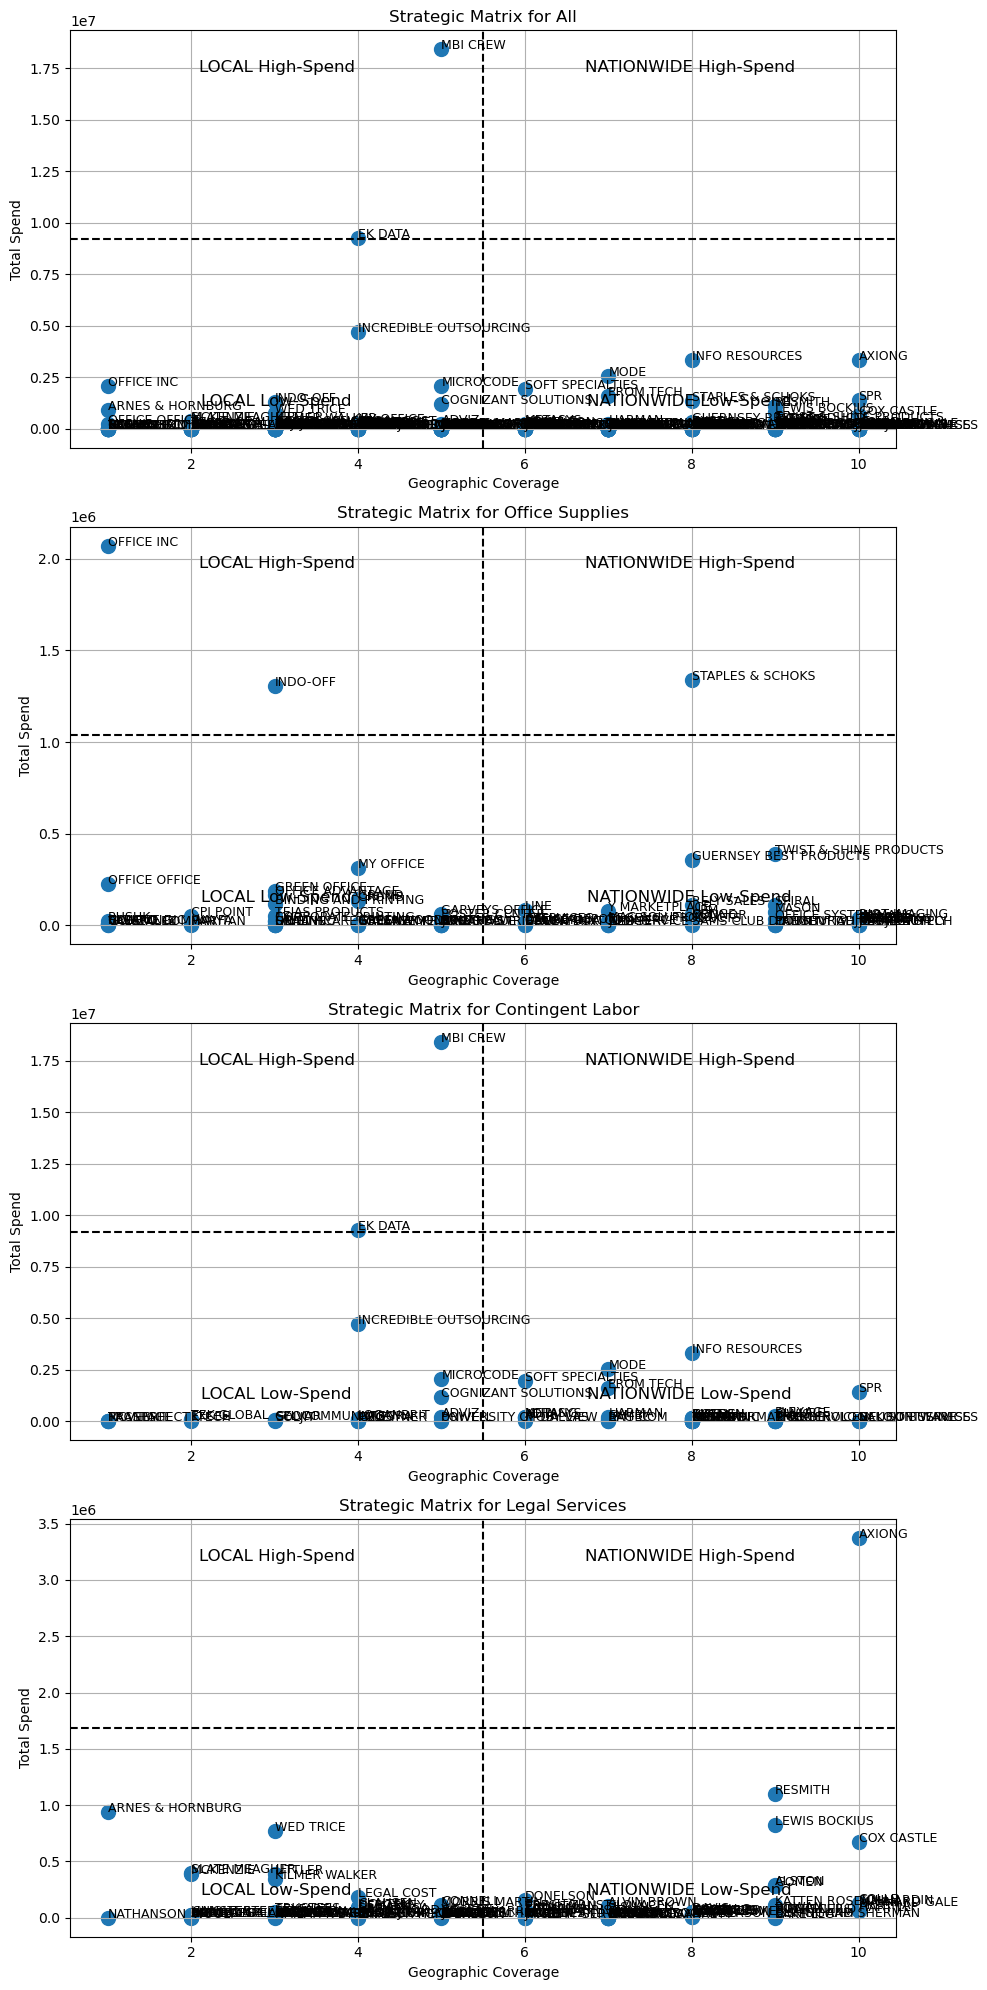

In [4]:
# Create a figure for the subplots
fig, axes = plt.subplots(len(all_sheets), 1, figsize=(10, len(all_sheets) * 5))

if len(all_sheets) == 1:
    axes = [axes]  # Ensure axes is always iterable

# Define a function to add quadrants to the plot
def add_quadrants(ax):
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.axhline(y=(ylim[0] + ylim[1]) / 2, color='black', linestyle='--')
    ax.axvline(x=(xlim[0] + xlim[1]) / 2, color='black', linestyle='--')
    ax.text(xlim[0] + (xlim[1] - xlim[0]) / 4, ylim[1] - (ylim[1] - ylim[0]) / 10, 'LOCAL High-Spend', fontsize=12, ha='center')
    ax.text(xlim[0] + 3 * (xlim[1] - xlim[0]) / 4, ylim[1] - (ylim[1] - ylim[0]) / 10, 'NATIONWIDE High-Spend', fontsize=12, ha='center')
    ax.text(xlim[0] + (xlim[1] - xlim[0]) / 4, ylim[0] + (ylim[1] - ylim[0]) / 10, 'LOCAL Low-Spend', fontsize=12, ha='center')
    ax.text(xlim[0] + 3 * (xlim[1] - xlim[0]) / 4, ylim[0] + (ylim[1] - ylim[0]) / 10, 'NATIONWIDE Low-Spend', fontsize=12, ha='center')

# Loop through each sheet and create the strategic matrix plot
for ax, (sheet_name, df) in zip(axes, all_sheets.items()):
    if 'Geo-Coverage' in df.columns and 'Total Spend' in df.columns:
        df_sorted = df.sort_values(by='Total Spend', ascending=False)

        # Plot the data
        scatter = ax.scatter(df_sorted['Geo-Coverage'], df_sorted['Total Spend'], s=100)

        # Annotate each point with the supplier name
        for i, row in df_sorted.iterrows():
            ax.annotate(row['Supplier'], (row['Geo-Coverage'], row['Total Spend']), fontsize=9)

        ax.set_title(f'Strategic Matrix for {sheet_name}')
        ax.set_xlabel('Geographic Coverage')
        ax.set_ylabel('Total Spend')
        ax.grid(True)

        # Add quadrants to the plot
        add_quadrants(ax)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

